# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [45]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


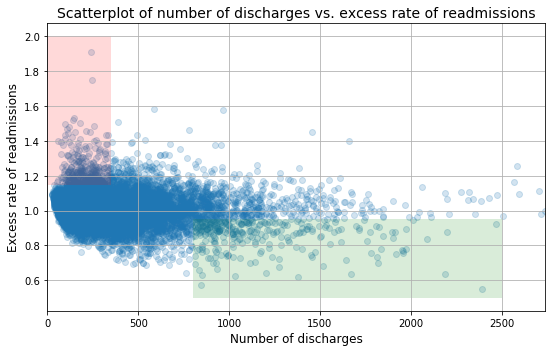

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

# 1. Setup an appropriate hypothesis test.

### Choose Test Statistic

We can use __Pearson correlation coefficient__ to test correlation.

 ### Build Hypothesis

H<sub>0</sub>: There is no significant correlation between hospital capacity and readmission rates.

H<sub>1</sub>: There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

### Draw Replicates

Given H<sub>0</sub> is true, which means hospital capacity and readmission rates have no correlation. We can do permutation on hospital capacity and keep readmission rates to completely eliminate the correlation between them.

In [53]:
def pearson_corr(x, y):
    """Calculate pearson correlation coefficient"""
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]


def draw_perm_reps(data1, data2, func, size=1):
    """Permute data and generate replicates"""
    reps = np.empty(size)
    for i in range(size):
        perm_data1 = np.random.permutation(data1)
        reps[i] = func(perm_data1, data2)
    return reps


pearson_obs = pearson_corr(x, y)
print(f'The observed pearson correlation is {pearson_obs}')

The observed pearson correlation is -0.09309554287590442


# 2. Compute and report the observed significance value (or p-value).

In [36]:
bs_reps = draw_perm_reps(x, y, func=pearson_corr, size=10000)
p_value = np.sum(bs_reps <= pearson_obs) / len(bs_reps)
print(f'P-Value is {p_value}')

P-Value is 0.0


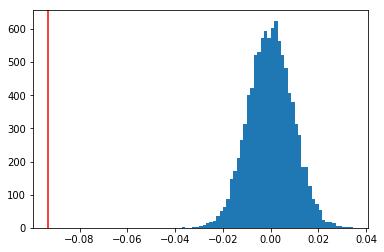

In [39]:
plt.hist(bs_reps, bins=50)
plt.axvline(pearson_obs, color='red')
plt.show()

# 3. Report statistical significance for  𝛼  = .01.

In [37]:
ALPHA = 0.01

if p_value > ALPHA:
    print('Fail to reject H0, hospital capacity and readmission rates have no statistically significant correlation.')
else:
    print('Reject H0, hospital capacity and readmission rates have statistically significant correlation.')

Reject H0, hospital capacity and readmission rates have statistically significant correlation.


# 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

### Statistical Significance vs. Practical Significance
Statistical significance shows that how unlikely to have the sample observation given null hypothesis is true is caused by sampling error. It's highly affected by sample size.

Practical significance means how much impact the sample observation does in real word.

For example, assume the sample mean of elevator waiting time in the building is 30.6s, we're testing if the real mean of waiting time is 30s. The hypothesis test may suggest that there is a statistically significant difference between 30.6s and 30s. But in real world, 0.6s is really not a big difference for elevator waiting time.

### Recommendation Change

In terms of practical significance, as the observed pearson correlation is so small (-0.09309554287590442), it may not be appropriate to give the two recommendation anymore.

# 5. Look at the scatterplot above.
- What are the advantages and disadvantages of using this plot to convey information?
- Construct another plot that conveys the same information in a more direct manner.

The scatter plot does convey the relationship between the number of discharges and excess rate of readmissions. But it would be more clear to show a regression line to show the change of readmissions rate with the increase of number of discharges.

### Bubble Plot

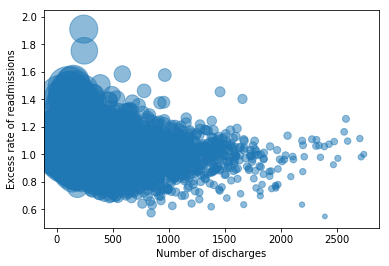

In [52]:
z = np.divide(y, x)
plt.scatter(x, y, s=z*100000, alpha=0.5)
plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmissions')
plt.show()

Here a third variable (readmissions rate / number of discharges) is added, but it's still not very good at deliverying our information.

### Joint Plot

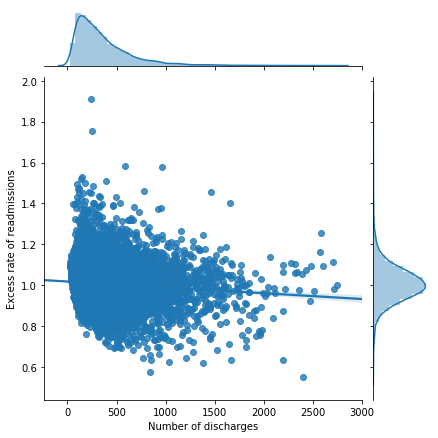

In [50]:
sns.jointplot(x, y, kind='reg')
plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmissions')
plt.show()

We can see that adding a regression line here can make our intention more clear.